In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [33]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

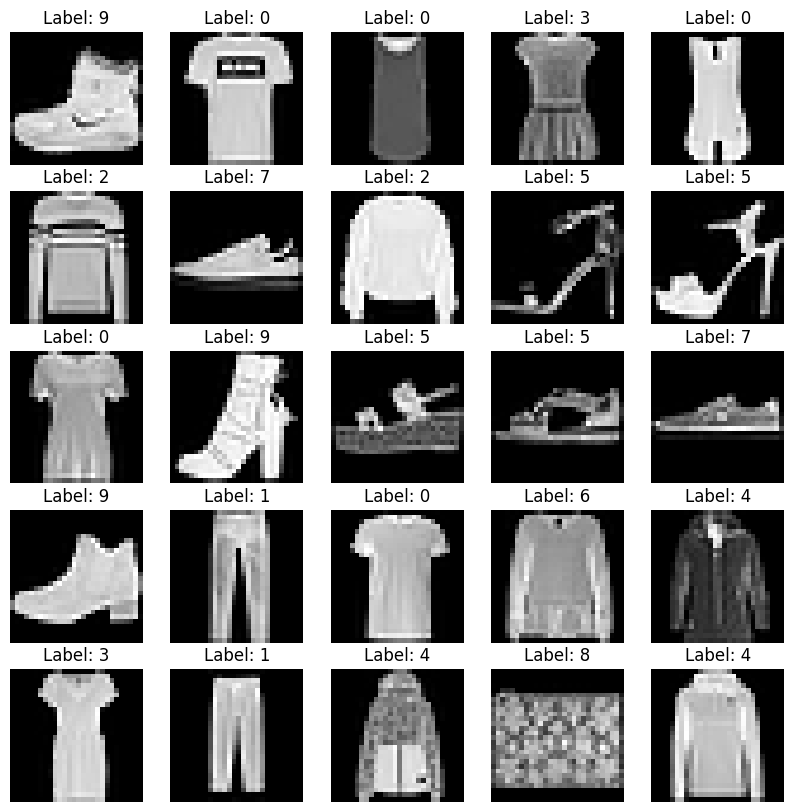

In [34]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.show()

In [35]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10


In [36]:
def data_summary(X_train,Y_train,X_test,Y_test):
    print('Train images shape:',X_train.shape)
    print('Train labels shape:',Y_train.shape)
    print('Test images shape:',X_test.shape)
    print('Test labels shape:',Y_test.shape)
    print('Train labels:',Y_train)
    print("Test labels:",Y_test)

In [37]:
data_summary(X_train,Y_train,X_test,Y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [9 0 0 ... 3 0 5]
Test labels: [9 2 1 ... 8 1 5]


In [38]:
#Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS*NUM_COLS))
X_train = X_train.astype('float32')/255.
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS*NUM_COLS))
X_test = X_test.astype('float32')/255.

In [39]:
#Categorically encode Labels
Y_train = to_categorical(Y_train,NUM_CLASSES)
Y_test = to_categorical(Y_test,NUM_CLASSES)

In [40]:
#Check state of dataset
data_summary(X_train,Y_train,X_test,Y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test labels: [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Model Development

In [41]:
#Sequential Model
from keras import models
from keras.layers import Dense, Dropout


In [42]:
#Build neual network
model = models.Sequential()
model.add(Dense(512,activation='relu',input_shape=(NUM_ROWS*NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [45]:
# Specify the directory where TensorBoard will store its logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create a TensorBoard callback with the specified log directory
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [46]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test),
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5901 - accuracy: 0.7849 - val_loss: 0.4369 - val_accuracy: 0.8459
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4680 - accuracy: 0.8310 - val_loss: 0.4208 - val_accuracy: 0.8491
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4312 - accuracy: 0.8425 - val_loss: 0.3878 - val_accuracy: 0.8629
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4055 - accuracy: 0.8528 - val_loss: 0.3852 - val_accuracy: 0.8591
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3931 - accuracy: 0.8550 - val_loss: 0.3769 - val_accuracy: 0.8642
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3844 - accuracy: 0.8612 - val_loss: 0.3676 - val_accuracy: 0.8634
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3769 - accuracy: 0.8635 - val_loss: 0.3581 - va

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8760

Test Accuracy: 87.60%


In [48]:
model.save('fashion_mnist_model.h5')
print("Model saved successfully.")

Model saved successfully.


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('fashion_mnist_model.h5')

# Display the architecture of the loaded model
loaded_model.summary()

# Check the consistency in the number of parameters and weights
original_model_params = model.count_params()
loaded_model_params = loaded_model.count_params()

if original_model_params == loaded_model_params:
    print("Number of parameters is consistent.")
else:
    print("Warning: Inconsistent number of parameters.")

# Verify the weights by comparing them
for layer, loaded_layer in zip(model.layers, loaded_model.layers):
    if all(tf.reduce_all(tf.equal(layer.get_weights()[i], loaded_layer.get_weights()[i])) for i in range(len(layer.get_weights()))):
        print(f"Weights for {layer.name} are consistent.")
    else:
        print(f"Warning: Inconsistent weights for {layer.name}.")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Number of paramete